Task 2: Credit Risk Prediction

# Introduction to Problem Statement

In this task, the goal is to predict whether a loan applicant is likely to default based on personal and financial information. The dataset, commonly referred to as the Loan Prediction Dataset, contains various attributes such as the applicant’s income, education, loan amount, employment status, and credit history.

This kind of prediction is essential for banks and financial institutions to minimize financial risk and make more informed decisions about approving or rejecting loan applications. By using classification models, we aim to build a system that can accurately distinguish between high-risk and low-risk applicants, ultimately improving the efficiency of the loan approval process.

IMPORTING ALL THE libraries

In [1]:
import numpy as np
import os
import pandas as pd
import  warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")

 Load AND Inspect Data (EDA)

In [2]:
X=pd.read_csv('train.csv')
Y=pd.read_csv('test.csv')

In [3]:
X = pd.read_csv('train.csv')
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
X.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
X.shape

(614, 13)

In [8]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
print(X.isnull().sum().sum())
print(X.isnull().sum())

149
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
X.duplicated().sum()

0

In [11]:
X.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
X.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [13]:
X.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

HANDLING MISSING VALUES

In [14]:
print(f"traning model (row, col) : {X.shape}\n\ntesting model  (row, col) : {Y.shape}")

traning model (row, col) : (614, 13)

testing model  (row, col) : (367, 12)


In [15]:
# so removing it helps avoid irrelevant information affecting the model.
X.drop('Loan_ID', axis=1, inplace=True)
Y.drop('Loan_ID', axis=1, inplace=True)

# Print the shape (rows and columns) of training and testing sets to confirm the change
print(f"training model (row, col): {X.shape}\n\ntesting model (row, col): {Y.shape}")

traning model (row, col) : (614, 12)

testing model  (row, col) : (367, 11)


In [16]:
X.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
null_column=['Gender' , 'Married' , 'Self_Employed' , 'LoanAmount' , 'Loan_Amount_Term' , 'Credit_History' , 'Dependents']
for col in null_column:
    X[col]=X[col].fillna(X[col].dropna().mode().values[0])

X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

DATA VISUALIZATION

In [18]:
num_col=X.select_dtypes(include='number').columns.tolist()
catg_col=X.select_dtypes(include='object').columns.tolist()
loan_am=X[num_col]
loan_catg=X[catg_col]
income=X[num_col]

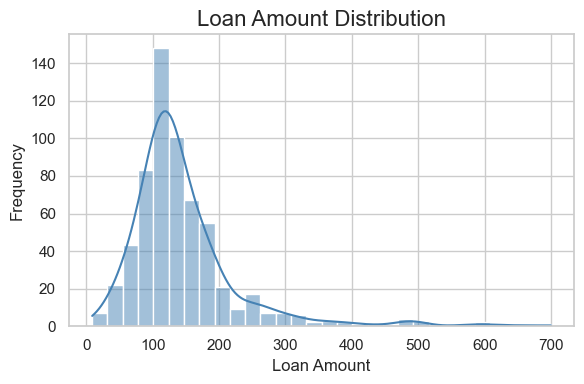

In [37]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.histplot(X['LoanAmount'], bins=30, kde=True, color='steelblue')
plt.title('Loan Amount Distribution', fontsize=16)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This histogram shows how loan amounts are spread across applicants.
It helps us identify common loan sizes and detect outliers or skewed data.
The smooth curve adds clarity to the shape of the distribution.

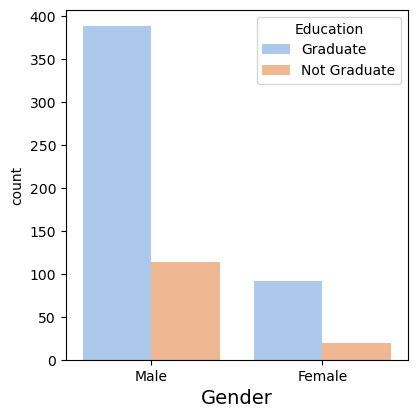

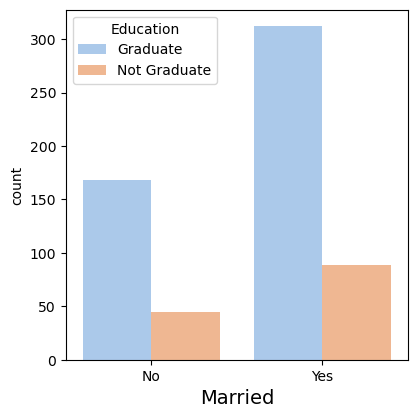

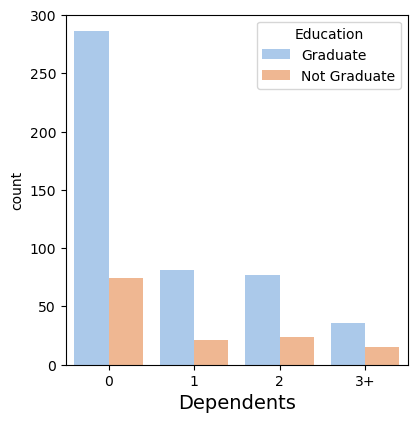

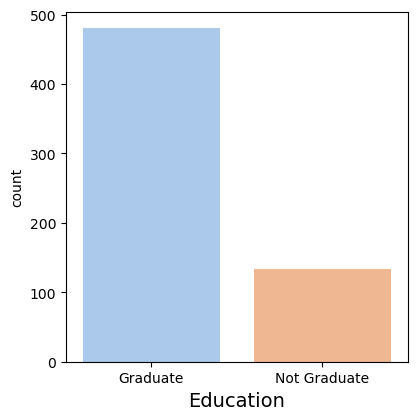

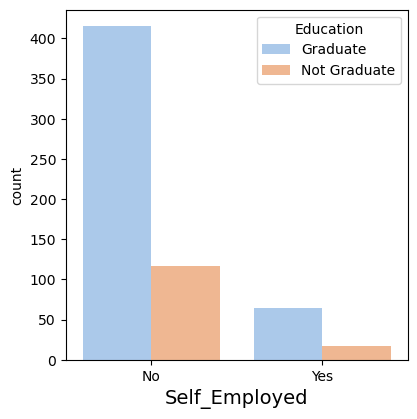

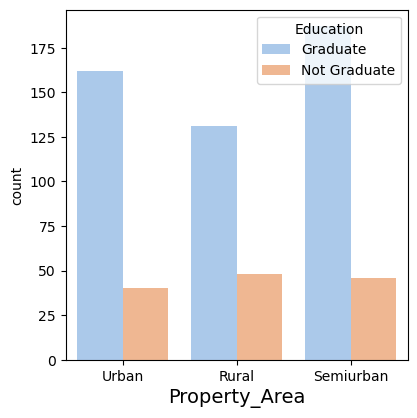

In [20]:
for i in catg_col[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i , hue='Education' , data=X , palette='pastel')
    plt.xlabel(i , fontsize=14)
    plt.show()

These grouped bar charts show how different categorical features vary across education levels.
They help us spot patterns, like whether graduates are more likely to be male or live in urban areas.
By comparing the group sizes visually, we understand how education interacts with other attributes.


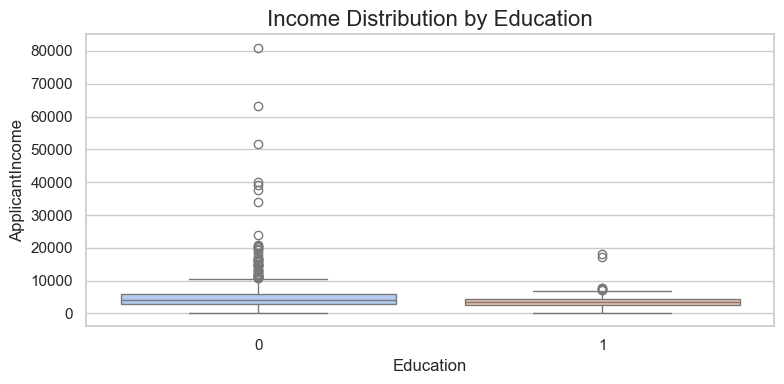

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(data=X, y='ApplicantIncome', x='Education', palette='coolwarm')
plt.title('Income Distribution by Education', fontsize=16)
plt.tight_layout()
plt.show()

This box plot compares applicant income between graduates and non-graduates.
We can easily spot differences in income levels and income spread.
Outliers and median values give insight into financial capacity by education.

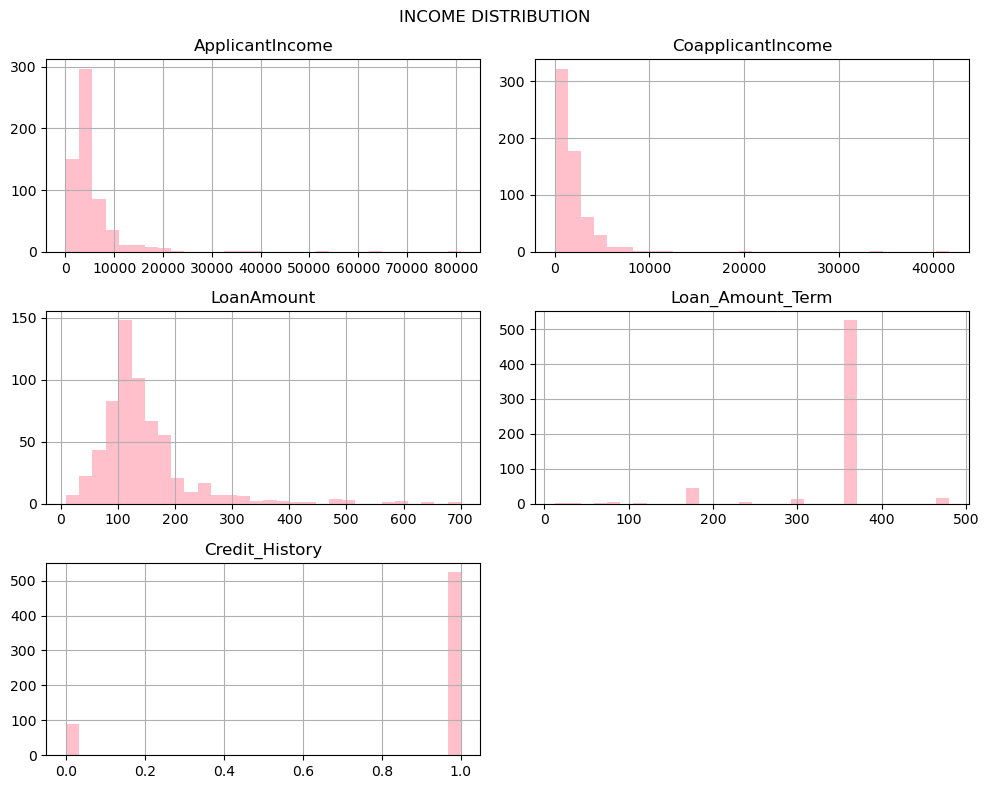

In [21]:
income.hist(figsize=(10,8), bins=(30) , color='pink')
plt.suptitle('INCOME DISTRIBUTION')
plt.tight_layout()
plt.show()
             

This histogram shows how applicant incomes are distributed in the dataset.
It helps reveal whether most applicants earn within a specific income range or if the data is skewed.
The plot also makes it easy to spot unusually high incomes that might affect model training.

Categorical Encoding and Dependents Column Conversion

In [22]:
# Mapping dictionary to convert categorical string values to numeric codes
to_num = {
    'Male': 0, 'Female': 1,
    'Graduate': 0, 'Not Graduate': 1,
    'Yes': 0, 'No': 1,
    'Urban': 0, 'Rural': 1, 'Semiurban': 2,
    'Y': 1, 'N': 0,
    '3+': 3
}

# Replace categorical values in training set X using the mapping dictionary
X = X.replace(to_num)

# Replace categorical values in testing set Y using the same mapping dictionary
Y = Y.replace(to_num)

# Specifically replace the '3+' value in 'Dependents' column with numeric 3
X['Dependents'] = X['Dependents'].replace('3+', 3)
Y['Dependents'] = Y['Dependents'].replace('3+', 3)

# Convert the 'Dependents' column from object/string to numeric type in both datasets
Dependents_ = pd.to_numeric(X.Dependents)
Dependents__ = pd.to_numeric(Y.Dependents)

# Drop the old 'Dependents' column from X and Y since we will add the numeric version back
X.drop(['Dependents'], axis=1, inplace=True)
Y.drop(['Dependents'], axis=1, inplace=True)

# Rename the numeric Dependents series to match the column name
Dependents_.name = 'Dependents'
Dependents__.name = 'Dependents'

# Concatenate the new numeric 'Dependents' column back into the original dataframes
X = pd.concat([X, Dependents_], axis=1)
Y = pd.concat([Y, Dependents__], axis=1)

# Print shapes and info to verify the transformation and check data types
print(f"training set (row, col): {X.shape}\n\ntesting set (row, col): {Y.shape}\n")
print(X.info(), "\n\n", Y.info())


training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

In [23]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,0,1,0,1,5849,0.0,120.0,360.0,1.0,0,1,0
1,0,0,0,1,4583,1508.0,128.0,360.0,1.0,1,0,1
2,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,1,0
3,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,1,0
4,0,1,0,1,6000,0.0,141.0,360.0,1.0,0,1,0


TRAINING THE LogisticRegression MODEL

In [24]:
x = pd.get_dummies(X, drop_first=True) 
y = X['Loan_Status']
x = X.drop('Loan_Status', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



EVALUTING MODEL USING ACCURACY 

In [26]:
LR_SC = accuracy_score(y_pred,y_test)
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.8373983739837398


Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
dt_sc = accuracy_score(y_pred_dt,y_test)
print(classification_report(y_test, y_pred_dt))
print(f"{round(dt_sc*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.35      0.42      0.38        31
           1       0.79      0.74      0.76        92

    accuracy                           0.66       123
   macro avg       0.57      0.58      0.57       123
weighted avg       0.68      0.66      0.67       123

65.85% Accurate


CONFUSION MATRIX

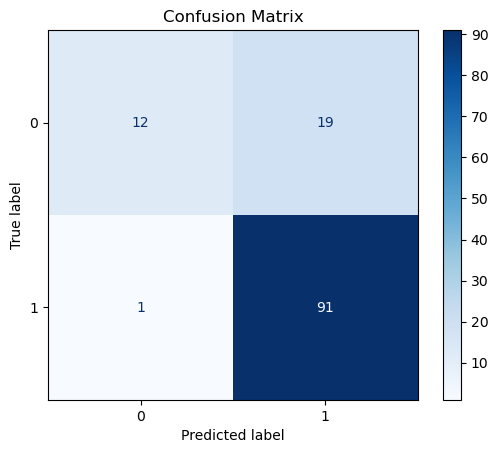

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = lr.predict(x_test)  

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  
plt.title("Confusion Matrix")
plt.show()


<Axes: >

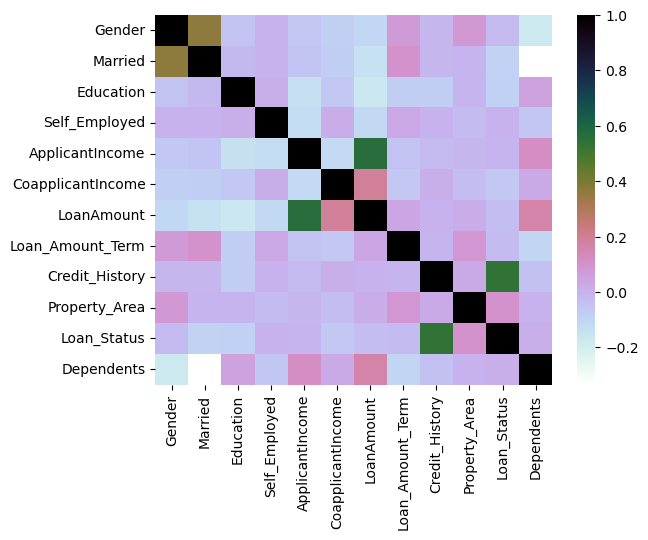

In [29]:
sns.heatmap(X.corr() ,cmap='cubehelix_r')

CONCLUSION:

I cleaned and preprocessed the Loan Prediction dataset, handling missing values and encoding categorical features. After exploratory data analysis, we trained two models: Logistic Regression and Decision Tree.
Logistic Regression achieved about 84% accuracy, outperforming the Decision Tree, which scored around 66%. Confusion matrices showed Logistic Regression predicts approvals well but misses some defaults.
In summary, Logistic Regression is the better model here, though there is room to improve detecting risky loans.